In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from load_data import GetZeoliteTsv
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import os
np.random.seed(1)

In [2]:
#zeolite datafile exported from excel
zeolite_fname = "/home/drewx/Documents/Project-Roger-Dodger/Python-ML/zeolites database one febl14.txt"
#filename for datafile
zeolite_outfile = "ZeoX_Final_encoded.tsv" 

In [3]:
#open the raw tsv data file 
#the file has to be correctly formatted with columns headers  
zeolite_fileObj = open(zeolite_fname)

In [4]:
#create an instance to start processing the datafile
getZeo = GetZeoliteTsv(zeolite_fileObj, zeolite_outfile)

In [5]:
#Sanity check of datatypes
#important to recognise that datatypes are detected from the files
#this step alsos makes the string variables as categorical variables
getZeo.set_dtypes()

,Adsorbent,SA,Vmicro,Vmeso,pore_size,Si_Al,Na,Ag,Ce,Cu,...,La,Cs,Pd,Nd,adsorbate,C_0,solvent,oil_adsorbent_ratio,Temp,Capacity
0,HFAU-5,NaN,0.2550,0.07,0.8000,2.600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,NaN,n-heptane,100.0,25.0,36.416000
1,HFAU-17,NaN,0.2550,0.13,0.8000,13.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,NaN,n-heptane,20.0,25.0,10.176000
2,HFAU-47,NaN,0.2450,0.11,0.8000,34.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,NaN,n-heptane,20.0,25.0,5.760000
3,CeY,590.00,0.2400,NaN,0.8100,2.100,NaN,NaN,2.62,NaN,...,NaN,NaN,NaN,NaN,TP,4.992000,n-heptane,1000.0,80.0,0.640000
4,CeY,590.00,0.2400,NaN,0.8100,2.100,NaN,NaN,2.62,NaN,...,NaN,NaN,NaN,NaN,BT,4.992000,n-heptane,1000.0,80.0,0.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,36.312849,iso-octane,20.0,30.0,5.767327
303,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,51.326816,iso-octane,20.0,30.0,6.336634
304,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,92.527933,iso-octane,20.0,30.0,6.980198
305,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,142.807263,iso-octane,20.0,30.0,7.376238


In [6]:
#this counts the missing records per column and saves them to provided filename
getZeo.missingness("ZeoX_Final_encoded.miss")

,Feature,Missingness
Adsorbent,Adsorbent,0.00
SA,SA,0.98
Vmicro,Vmicro,8.47
Vmeso,Vmeso,65.80
pore_size,pore_size,42.67
Si_Al,Si_Al,3.91
Na,Na,54.40
Ag,Ag,59.93
Ce,Ce,73.29
Cu,Cu,79.48


In [7]:
#take not of number of columns
getZeo.zeolite_df.shape

(307, 23)

In [8]:
#Drops empty columns inplace
getZeo.zeolite_df.dropna(how='all', axis=1, inplace = True)

In [9]:
#Very that columns have indeed been lost
getZeo.zeolite_df.shape

(307, 19)

In [10]:
#Imputation: step by step for easy debugging
getZeo.GroupMeanImputation('Adsorbent','SA')
#This last step takes care of singletons 
getZeo.MeanImputation('SA')

In [11]:
getZeo.GroupMeanImputation('Adsorbent','Vmicro')
getZeo.MeanImputation('Vmicro')

In [12]:
getZeo.GroupMeanImputation('Adsorbent','Vmeso')
getZeo.MeanImputation('Vmeso')

In [13]:
getZeo.GroupMeanImputation('Adsorbent','pore_size')
getZeo.MeanImputation('pore_size')

In [14]:
getZeo.GroupMeanImputation('Adsorbent','pore_size')
getZeo.MeanImputation('pore_size')

In [15]:
getZeo.GroupMeanImputation('Adsorbent','Si_Al')
getZeo.MeanImputation('Si_Al')

In [16]:
#Mean imputations only for these variables
#Names from column headers
for var in ["C_0","oil_adsorbent_ratio","Temp"]:
         getZeo.MeanImputation(var)

In [17]:
getZeo.zeolite_df.columns

Index(['Adsorbent', 'SA', 'Vmicro', 'Vmeso', 'pore_size', 'Si_Al', 'Na', 'Ag',
       'Ce', 'Cu', 'Ni', 'Zn', 'Cs', 'adsorbate', 'C_0', 'solvent',
       'oil_adsorbent_ratio', 'Temp', 'Capacity'],
      dtype='object')

In [18]:
#Fill missing values for metals with zeros
for metal in ['Na', 'Ag', 'Ce', 'Cu', 'Ni', 'Zn','Cs']:
         getZeo.zerofill(metal)

In [19]:
#convert the categorical variables to intergers also known as one-hot-encoding
#https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
getZeo.encode_categorical()

In [20]:
#save the new data to a tsv file
getZeo.save_zeo("ZeoX_Final_encoded.tsv")

In [21]:
#get our dataframe 
zeolite_final  = getZeo.zeolite_df

In [22]:
#check our dataframe
zeolite_final.shape

(307, 46)

In [23]:
#We extract our data features 
#attributes 
y = zeolite_final.loc[:,"Capacity"].values
#labels
X = zeolite_final.drop(["Capacity"], axis = 1).values

In [24]:
#Split our data into training and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
y_train.shape

(245,)

In [26]:
y_test.shape

(62,)

In [27]:
#Standardize features by removing the mean and scaling to unit variasnce
sc = StandardScaler()
#https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models#:~:text=%22fit%22%20computes%20the%20mean%20and,both%20at%20the%20same%20time.
#This should not make much of a difference but its good practice
#TO DO
#Compare accuracy with and without scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
n_trees = 1000
n_feat = 0
#max_features=n_features,
regressor = RandomForestRegressor(n_estimators=n_trees, random_state=0)
#TO DO
#increase n_estimators
#run in parallel

In [29]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
data = pd.DataFrame.from_dict({'y_pred': y_pred, 'y_test': y_test, 'errors': y_pred - y_test, 'abs_errors': abs(y_pred - y_test)})

In [32]:
pd.options.display.max_rows = 4000
data

,y_pred,y_test,errors,abs_errors
0,48.862466,54.000000,-5.137534,5.137534
1,30.326176,35.202098,-4.875922,4.875922
2,188.660285,197.660393,-9.000109,9.000109
3,26.563374,29.300268,-2.736894,2.736894
4,23.640700,24.125044,-0.484344,0.484344
5,13.576457,25.615385,-12.038927,12.038927
6,94.856515,88.225362,6.631152,6.631152
7,39.010565,28.000000,11.010565,11.010565
8,121.437624,106.240000,15.197624,15.197624
9,44.464232,34.000000,10.464232,10.464232


In [36]:
data.to_csv("random_forest.dataset")

In [37]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared = False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2 =  metrics.r2_score(y_test, y_pred)

In [38]:
data_table = pd.DataFrame.from_dict({"n_feat": [n_feat],
                                    "n_trees":[n_trees],
                                     "mae": [mae], 
                                     "mse": [mse], 
                                     "rmse":[rmse],
                                     "r2":[r2],
                                     "mape":[mape]})

In [40]:
data_table

,n_feat,n_trees,mae,mse,rmse,r2,mape
0,0,1000,5.302971,139.389812,11.806346,0.907634,11.095915


In [41]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred, y_test)

In [42]:
print("Correlation coefficient (R): {:.4f} ".format(r_value))
print("p-value : {}".format(p_value))
print("Intercept: {:.4f}".format(intercept))
print("Slope: {:.4f}".format(slope))
print("std_error: {:.4f}".format(std_err))

Correlation coefficient (R): 0.9548 
p-value : 2.6353539343729915e-33
Intercept: -1.4843
Slope: 0.9754
std_error: 0.0392


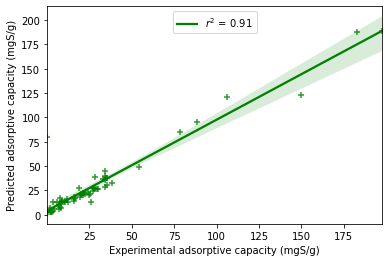

'/home/drewx/Documents/Project-Roger-Dodger/Python-ML'

In [43]:
ax = sns.regplot(y="y_pred",
                 x="y_test", 
                 color="g", 
                 marker="+",
                 line_kws={'label':'$r^2$ = {:.2f}'.format(r_value**2)},
                 data = data)

plt.ylabel('Predicted adsorptive capacity (mgS/g)')
plt.xlabel('Experimental adsorptive capacity (mgS/g)')
ax.legend(loc=9)
plt.savefig('traning_r2.pdf', format='pdf', dpi=1200)
plt.show()
os.getcwd()

#https://stackoverflow.com/questions/51953709/fast-pairwise-simple-linear-regression-between-variables-in-a-data-frame